# Exploratory Task 3


In this task, we are initially checking for missing/null values in the US-All datasets and the X dataset. 

There is a date format difference between US-All datasets and our X (Homelessness) dataset. 
Our X dataset had the format mm/dd/yyyy whereas the US-All dataset has yyyy-mm-dd. We have converted X dataset format to yyyy-mm-dd.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
us_confirmed = pd.read_csv("US-all/US_confirmed.csv")
us_deaths = pd.read_csv("US-all/US_deaths.csv")
homeless = pd.read_csv("US-all/DHS_Daily_Report.csv")

In [3]:
#Checking for null values in dataset

print(us_confirmed.isnull().values.any())
print(us_deaths.isnull().values.any())
print(homeless.isnull().values.any())

False
False
False


There are **no missing values** in any of the datasets.

In [4]:
#Converting date in homeless dataset to consistent format - yyyy-mm-dd, and sorting it in descending order

homeless['Date of Census'] = pd.to_datetime(homeless['Date of Census'])
homeless.sort_values(by=['Date of Census'], inplace=True, ascending=False)

In [5]:
homeless.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
2792,2021-05-10,33430,15504,48934,13565,4361,17926,8920,11728,15504,27232,1795,3776
2791,2021-05-09,33565,15619,49184,13614,4346,17960,8981,11814,15619,27433,1802,3791
2790,2021-05-08,33466,15630,49096,13479,4360,17839,8994,11833,15630,27463,1804,3794
2789,2021-05-07,33511,15606,49117,13490,4377,17867,8999,11844,15606,27450,1807,3800
2788,2021-05-06,33560,15587,49147,13551,4389,17940,8985,11828,15587,27415,1803,3792


In [6]:
def plotGraph(date,data):
    plt.plot(date,data,label="Total Homeless")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(loc='upper right')
    plt.xticks(rotation=30)
    plt.show()

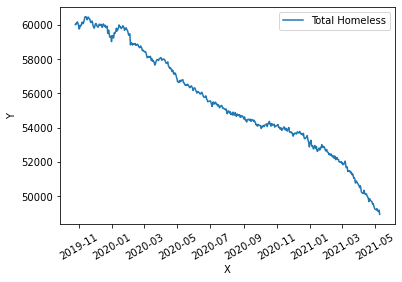

In [7]:
date = homeless['Date of Census'][:600]
individualsInShelter = homeless['Total Individuals in Shelter'][:600]
plotGraph(date,individualsInShelter)

As we are using entire US data, and don't need individual state level data for our X dataset, we have added the values in US_deaths datasets to get the total deaths and added it as a new column.

In [8]:
us_deaths_transposed = us_deaths.T
new_header = us_deaths_transposed.iloc[0] #grab the first row for the header
us_deaths_transposed= us_deaths_transposed[1:] #take the data less the header row
us_deaths_transposed.columns = new_header #set the header row as the df header
us_deaths_transposed['total_death'] = us_deaths_transposed.sum(axis =1)

In [9]:
date = us_deaths_transposed.index
us_deaths_transposed['date'] = date

The data given in US_deaths is cumulative, so we have converted it into per day stats.

In [10]:
us_deaths_transposed = us_deaths_transposed.set_index('date').diff()

In [11]:
us_deaths_transposed = us_deaths_transposed.reset_index()

As we are using entire US data, and don't need individual state level data for our X dataset, we have added the values in US_confirmed datasets to get the total confirmed cases and added it as a new column.

In [12]:
us_confirmed_transposed = us_confirmed.T
new_header = us_confirmed_transposed.iloc[0] #grab the first row for the header
us_confirmed_transposed= us_confirmed_transposed[1:] #take the data less the header row
us_confirmed_transposed.columns = new_header #set the header row as the df header
us_confirmed_transposed['total_confirmed_cases'] = us_confirmed_transposed.sum(axis =1)

In [13]:
date = us_confirmed_transposed.index
us_confirmed_transposed['date'] = date

The data given in US_deaths is cumulative, so we have converted it into per day stats.

In [14]:
us_confirmed_transposed = us_confirmed_transposed.set_index('date').diff()

In [15]:
us_confirmed_transposed = us_confirmed_transposed.reset_index()

## Inference 1 : Pearson Correlation Coefficient


If we observe the below reference , "March 11" was the date when WHO Declares COVID-19 as a Pandemic. <br>
Covid cases have drastically raised all around the world in March 2020 (https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020). Hence, we have decided to consider the data for March 2020 and analyse the impact of Covid on Homeless Shelter

In this inference, we are calculating the PEARSON CORRELATION COEFFICIENT for CONFIRMED CASES v/s TOTAL INVIDUALS IN HOMELESS SHELTER in the Month of March, 2020


In [16]:
def person_correlation_coefficient(x, y):
    cov_matrix = np.cov(x,y)
    r = cov_matrix[0][1]/np.sqrt((cov_matrix[0][0]*cov_matrix[1][1]))
    print("Pearson Correlation Coefficient Value is: " + "{:5.2f}".format(r))
    return r

In [17]:
us_confirmed_march = us_confirmed_transposed[((us_confirmed_transposed['date'] >= '2020-03-01'))][:30]
homeless_march = homeless[((homeless['Date of Census'].dt.strftime('%Y-%m-%d') >= '2020-03-01'))][-30:]

In [18]:
homeless_march.rename(columns={'Date of Census': 'date'}, inplace=True)
homeless_march.date = homeless_march.date.astype(str)
us_confirmed_march.date = us_confirmed_march.date.astype(str)
df = pd.merge(us_confirmed_march, homeless_march, on=['date'])

In [19]:
person_correlation_coefficient(np.array(us_confirmed_march['total_confirmed_cases']), np.array(homeless_march['Total Individuals in Shelter']))

Pearson Correlation Coefficient Value is:  0.87


0.8667049105387643

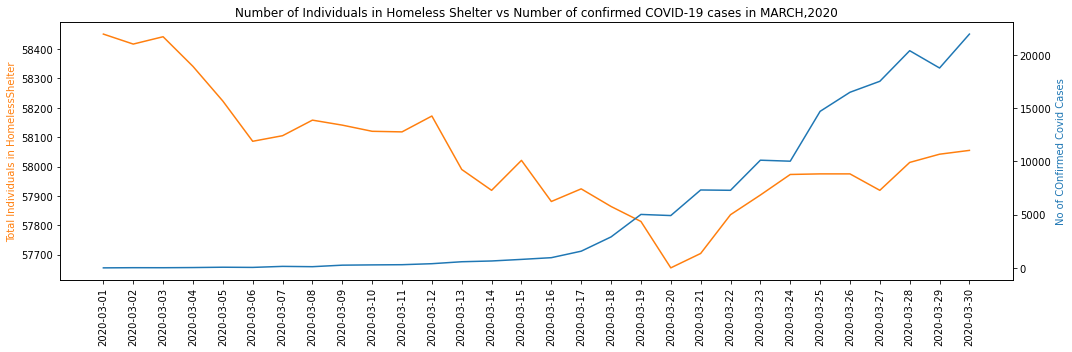

In [20]:
fig, ax1 = plt.subplots(figsize = (15,5))
ax1.plot(df['date'],df['Total Individuals in Shelter'], color = 'tab:orange')
ax1.set_xticks(df.date)
ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
ax1.set_ylabel('Total Individuals in HomelessShelter',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(df['date'],df['total_confirmed_cases'],color = 'tab:blue')
ax2.set_ylabel('No of COnfirmed Covid Cases',color = 'tab:blue')
plt.title('Number of Individuals in Homeless Shelter vs Number of confirmed COVID-19 cases in MARCH,2020')
fig.tight_layout()
plt.show()

## Observation :

The below is the analysis for Number of individuals in Homeless Shelter vs Number of confirmed COVID-19 cases (in MARCH'20)

Pearson Correlation Coefficient Value is: 0.87

This value shows a strong postive correlation between Number of individuals in Homeless Shelter and Number of confirmed COVID-19 cases.This implies that Covid pandemic has an impact on people's lives causing lot of individuals to lose their job and income due to the ongoing pandemic. Due to loss of income and quality of life, many people have gone homeless, and had to move into a shelter. Hence we can infer that as the impact of Covid increases(/cases increased),total Individuals in Homeless Shelter increases.


## Inference 2 : Chi-Square Test

In this inference, we are checking if the covid vaccination had an impact on the homeless people in the shelter.
We have chosen 60 days before and after the vaccination drive started in the USA (2020-12-14). 
From the US-all datasets, we are taking the total covid deaths and total covid confirmed cases.
From the X (Homeless) dataset, we are taking the total homeless men and the total homeless women in the shelter.

Our null hypothesis is that the underlying distributions both datasets are independent, i.e, the vaccination drive did not have an impact on the distributions, and the distribution of US cases and deaths is independent of distribution of the number of single men and single women in the shelter.

We are taking threshold as alpha = 0.05

In [21]:
#homeless dataset split into 60 days before/after the covid vaccination drive of 2020-12-14

homeless_after_vaccine = homeless[((homeless['Date of Census'].dt.strftime('%Y-%m-%d') >= '2020-12-14'))][-60:]
homeless_before_vaccine = homeless[(homeless['Date of Census'].dt.strftime('%Y-%m-%d') <= '2020-12-14')][:60]

In [22]:
#us_deaths dataset split into 60 days before/after the covid vaccination drive of 2020-12-14

us_deaths_after_vaccine = us_deaths_transposed[((us_deaths_transposed['date'] >= '2020-12-14'))][:60]
us_deaths_before_vaccine = us_deaths_transposed[((us_deaths_transposed['date'] <= '2020-12-14'))][-60:]

In [ ]:
#us_confirmed dataset split into 60 days before/after the covid vaccination drive of 2020-12-14

us_confirmed_after_vaccine = us_confirmed_transposed[((us_confirmed_transposed['date'] >= '2020-12-14'))][:60]
us_confirmed_before_vaccine = us_confirmed_transposed[((us_confirmed_transposed['date'] <= '2020-12-14'))][-60:]

In [ ]:
# observed values for the chi-squared test - The rows are before/after vaccine, and columns are confirmed covid cases, 
# covid deaths,homeless women in shelter, homeless men in shelter.

observed_values = np.zeros([2,4],int)
observed_values[0][0] = us_confirmed_before_vaccine['total_confirmed_cases'].sum()
observed_values[1][0] = us_confirmed_after_vaccine['total_confirmed_cases'].sum()
observed_values[0][1] = us_deaths_before_vaccine['total_death'].sum()
observed_values[1][1] = us_deaths_after_vaccine['total_death'].sum()
observed_values[0][2] = homeless_before_vaccine['Single Adult Men in Shelter'].sum()
observed_values[1][2] = homeless_after_vaccine['Single Adult Men in Shelter'].sum()
observed_values[0][3] = homeless_before_vaccine['Single Adult Women in Shelter'].sum()
observed_values[1][3] = homeless_after_vaccine['Single Adult Women in Shelter'].sum()

rows = 2
cols = 4

df = (rows-1)*(cols-1)

total_row1,total_row2= np.sum(observed_values,axis=1)
total_col1,total_col2,total_col3,total_col4  = np.sum(observed_values,axis=0)


total = total_row1+total_row2 

#expected values for the chi-squared test
expected_values = np.zeros([2,4])
expected_values[0][0] = (float(total_col1)*total_row1)/(total)
expected_values[1][0] = (float(total_col1)*total_row2)/(total)
expected_values[0][1] = (float(total_col2)*total_row1)/(total)
expected_values[1][1] = (float(total_col2)*total_row2)/(total)
expected_values[0][2] = (float(total_col3)*total_row1)/(total)
expected_values[1][2] = (float(total_col3)*total_row2)/(total)
expected_values[0][3] = (float(total_col4)*total_row1)/(total)
expected_values[1][3] = (float(total_col4)*total_row2)/(total)

#calculating q_expected value
q_expected = 0.0
for i in range(rows):
    for j in range(cols):
        q_expected += ((expected_values[i][j] - observed_values[i][j])**2)/float(expected_values[i][j])
        

#Displaying chi-square table as a dataframe        
df_ar1 = pd.DataFrame()
df_ar1['Date'] = ['Before Vaccine','After Vaccine']
df_ar1['Observed_Covid_Cases'] = observed_values[:,0]
df_ar1['Expected_Covid_Cases'] = expected_values[:,0]
df_ar1['Observed_Covid_Deaths'] = observed_values[:,1]
df_ar1['Expected_Covid_Deaths'] = expected_values[:,1]
df_ar1['Observed_Men_In_Shelter'] = observed_values[:,2]
df_ar1['Expected_Men_In_Shelter'] = expected_values[:,2]
df_ar1['Observed_Women_In_Shelter'] = observed_values[:,3]
df_ar1['Expected_Women_In_Shelter'] = expected_values[:,3]

print("\nChi squared table")
df_ar1

In [ ]:
print("Q_expected : ", q_expected)
print("Degrees of freedom : ",df)

## Observation :

Q_expected : 47835.53178643774 <br>
Degrees of freedom : 3 <br>

We are taking alpha = 0.05<br>
Since Q statistic is 47835( really large), with degrees of freedom = 3, we got from the p value calculator that the p-value will be < 0.00001 (really small).

The P-Value is < .00001. The result is significant at alpha < .05.

Hence, we reject the null hypothesis, and the initial covid vaccination drive of 14th December, 2020 had an impact, i.e, distribution of X = Men/Women in Shelters is dependent on the distribution of Y = US all cases/deaths.

## Inference 3 : Multi-variate Linear regression

In this inference, we are trying to predict the total deaths in the United States with the help of the data of homeless people in the United States.

In [ ]:
#function to calculate the parameters and the sse error
def parameter_search(x,y):
    w = np.zeros((np.shape(x)[1],0))
    A = np.dot(x.T,x)
    b = np.dot(x.T,y)
    beta = np.dot(np.linalg.pinv(A),b)
    #beta = np.linalg.solve(A,b)
    return beta

def sse_error(x,y_true,beta):
    y_pred = np.dot(x,beta)
    error = 0
    if len(y_true)!= len(y_pred):
        print("invalid")
        return
    for i in range(len(y_pred)):
        error+= np.power((y_true[i] - y_pred[i]),2)
    return error



In [ ]:
#manipulation of all US death data to get the total deaths in the US

us_all_data = us_deaths.T
new_header = us_all_data.iloc[0] #grab the first row for the header
us_all_data = us_all_data[1:] #take the data less the header row
us_all_data.columns = new_header #set the header row as the df header
us_all_data['total_death'] = us_all_data.sum(axis =1)
date = us_all_data.index
us_all_data['date'] = date
us_all_data = us_all_data.set_index('date').diff()
us_all_data = us_all_data.reset_index()
us_all_data = us_all_data[us_all_data['date']>'2020-01-01']
temp1 = us_all_data[['date','total_death']][1:]
temp1['date'] = pd.to_datetime(temp1['date'])

In [ ]:
#manipulation of the homeless so as to start is from 1st January 2020 so we can have overlap in our data

homeless['Date of Census'] = pd.DataFrame(pd.to_datetime(homeless['Date of Census']))
homeless = homeless.sort_values(by = 'Date of Census')

small_data = homeless[homeless['Date of Census']>'2020-01-01']
small_data = small_data[small_data['Date of Census']<='2021-04-03']
# temp2 = small_data[['Date of Census', 'Total Individuals in Shelter']]
temp2 = small_data

In [ ]:
#Merging both the homeless and the death data

temp = temp1.merge(temp2, how='left', left_on=['date'], right_on=['Date of Census'])
temp = temp.dropna()

In [ ]:
#find parameters values for all the features 

x = np.array(temp.drop(['total_death','date','Date of Census'], axis = 1))
y =np.reshape(np.array(temp['total_death']),(-1,1))
beta = parameter_search(x[:400],y[:400])
error = sse_error(x[400:],y[400:],beta)
print("The Error is:", error)
k = temp.drop(['total_death','date','Date of Census'], axis = 1)
for i in range(len(k.columns)):
    print("column name:", k.columns[i], " parameter value:", beta[i])

## Observation :

From the above we can see that the sum of squared error is too high, and hence we can't predict the total deaths based on the homeless people data.

## Additional Data Analysis

In [ ]:
date = homeless['Date of Census']
individualsInShelter = homeless['Total Individuals in Shelter']
plotGraph(date,individualsInShelter)

## Basic Interpretation 

From the above plot, we can see that the individual in the homeless centers were increasing or remaining the same from year 2014 to start of 2020. But after, the start of the pandemic the people in the shelter are decreasing. We can say that an important factor of this could be people fearing to contract covid in these homeless shelters due to staying in close quarters with many people. So, we can infer that the covid has impacted the number of individual staying in the shelter home.

So, this was something interesting and therefore, we tried another inference for this.


## Inference 4 : Chi-Square Test

In this inference, we are checking if the start of covid pandemic had an impact on the homeless people in the shelter. We have chosen 60 days before and after the start of covid in the USA (2020-03-01). From the US-all datasets, we are taking the total covid confirmed cases. From the X (Homeless) dataset, we are taking the total homeless individual in the shelters.

Our null hypothesis is that the underlying distributions both datasets are independent, i.e, the covid did not have an impact on the distributions, and the distribution of US cases is independent of distribution of the number of individuals in the shelter.

We are taking threshold as alpha = 0.05

In [ ]:
#homeless dataset split into 60 days before/after the covid pandemic start of 2020-03-01

homeless_after_covid = homeless[((homeless['Date of Census'].dt.strftime('%Y-%m-%d') >= '2020-03-01'))][-70:-10]
homeless_before_covid = homeless[(homeless['Date of Census'].dt.strftime('%Y-%m-%d') <= '2020-03-01')][100:160]

In [ ]:
#us confirmed dataset split into 60 days before/after the covid pandemic start of 2020-03-01

us_confirmed_after_covid = us_confirmed_transposed[((us_confirmed_transposed['date'] >= '2020-03-01'))][100:160]
us_confirmed_before_covid = us_confirmed_transposed[((us_confirmed_transposed['date'] <= '2020-03-01'))][-70:-10]

In [ ]:
#observed values for the chi-squared test
observed_values = np.zeros([2,2],int)
observed_values[0][0] = us_confirmed_before_covid['total_confirmed_cases'].sum()
observed_values[1][0] = us_confirmed_after_covid['total_confirmed_cases'].sum()
observed_values[0][1] = homeless_before_covid['Total Individuals in Shelter'].sum()
observed_values[1][1] = homeless_after_covid['Total Individuals in Shelter'].sum()

rows = 2
cols = 2

df = (rows-1)*(cols-1)

total_row1,total_row2 = np.sum(observed_values,axis=1)
total_col1,total_col2 = np.sum(observed_values,axis=0)


total = total_row1+total_row2 

#expected values for the chi-squared test
expected_values = np.zeros([2,4])
expected_values[0][0] = (float(total_col1)*total_row1)/(total)
expected_values[1][0] = (float(total_col1)*total_row2)/(total)
expected_values[0][1] = (float(total_col2)*total_row1)/(total)
expected_values[1][1] = (float(total_col2)*total_row2)/(total)

q_expected = 0.0
for i in range(rows):
    for j in range(cols):
        q_expected += ((expected_values[i][j] - observed_values[i][j])**2)/float(expected_values[i][j])
        

#Displaying chi-square table as a dataframe      
print("\nChi squared table")

df_ar1 = pd.DataFrame()
df_ar1['Date'] = ['Before Covid','After Covid']
df_ar1['Observed_Covid_Cases'] = observed_values[:,0]
df_ar1['Expected_Covid_Cases'] = expected_values[:,0]
df_ar1['Observed_Individual_In_Shelter'] = observed_values[:,1]
df_ar1['Expected_Individual_In_Shelter'] = expected_values[:,1]

df_ar1

In [ ]:
print("Q_expected : ", q_expected)
print("Degrees of freedom : ",df)

## Observation : 

Q_expected : 2248227.447271685 <br>
Degrees of freedom : 1 <br>
We are taking alpha = 0.05 <br>
Since Q statistic is 2248227.447271685(really large), with degrees of freedom = 1, we got from the p value calculator that the p-value will be < 0.00001 (really small).

The P-Value is < .00001. The result is significant at alpha < .05.

Hence, we reject the null hypothesis, and the number of covid cases had and impact on the Total number of individual in the shelter, i.e,  distribution of X = Total Individual in Shelters is dependent on the distribution of Y = US all cases. From, the result we can say that due to covid the people in the shelter home have started leaving the shelter home. This may not be the only factor but this is an important factor for people leaving the shelter homes.
